In [1]:
# from keras.models import Sequential
# from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
# import numpy as np
# from keras.preprocessing import image
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
# from tensorflow.python.keras.xx

# Import Packages

In [3]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

# Import Data

In [5]:
nbatch = 128
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(128,128),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')

Found 238829 images belonging to 2 classes.
Found 27258 images belonging to 2 classes.


# Data Split

Text(0.5, 0, 'Class')

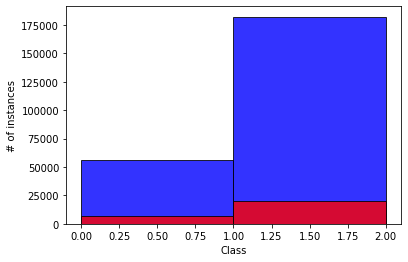

In [6]:
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='blue', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

# Visualise Data

(128, 128, 128, 3) (128,)


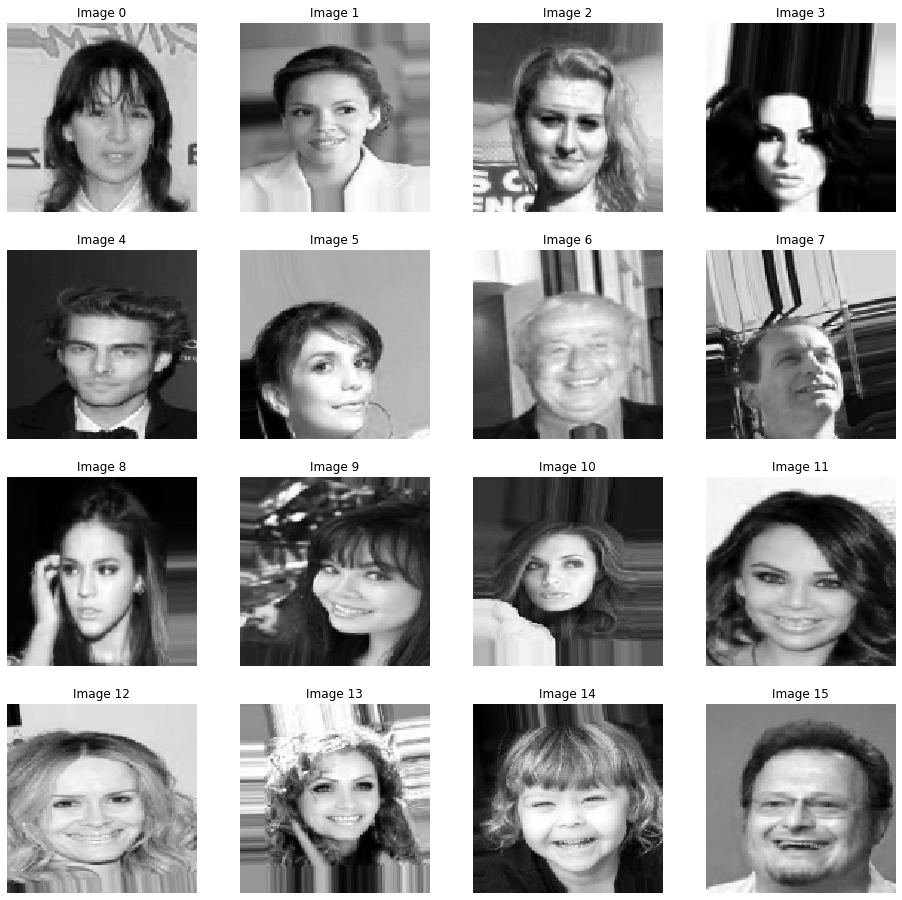

In [7]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Image ' + str(i))
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

# CNN Model

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu",
                units=256))

model.add(Dense(activation="sigmoid",
                units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [9]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [10]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

# Train Model

In [ ]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=640,
        epochs=16,
        validation_data=test_set,
        validation_steps=32,
        callbacks = callbacks_list
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16
640/640 [==============================] - 2195s 3s/step - loss: 0.2880 - accuracy: 0.8793 - val_loss: 0.2785 - val_accuracy: 0.8843
Epoch 2/16
640/640 [==============================] - 2304s 4s/step - loss: 0.1474 - accuracy: 0.9418 - val_loss: 0.2106 - val_accuracy: 0.9119
Epoch 3/16
640/640 [==============================] - 2295s 4s/step - loss: 0.0795 - accuracy: 0.9697 - val_loss: 0.5289 - val_accuracy: 0.8042
Epoch 4/16
640/640 [==============================] - 2355s 4s/step - loss: 0.0533 - accuracy: 0.9799 - val_loss: 0.0896 - val_accuracy: 0.9678
Epoch 5/16
640/640 [==============================] - 2334s 4s/step - loss: 0.0339 - accuracy: 0.9877 - val_loss: 0.0625 - val_accuracy: 0.9790
Epoch 6/16
640/640 [==============================] - 2245s 4s/step - loss: 0.0246 - accuracy: 0.9912 - val_loss: 0.1125 - val_accuracy: 0.9548
Epoch 7/16
640/640 [==============================] - 2320s 

In [ ]:
training_set.class_indices

# Plot Model Outcome

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [ ]:
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

# Save Model

In [ ]:
# architecture and weights to HDF5
model.save('models/CNNmodel_16.h5')

# architecture to JSON, weights to HDF5
model.save_weights('models/weights_16.h5')
with open('models/architecture.json', 'w') as f:
    f.write(model.to_json())
    
print("done")

In [ ]:
from tensorflow.python.keras.models import load_model, model_from_json

In [ ]:
# architecture and weights from HDF5
trained_model = load_model('models/CNNmodel_16.h5', compile=False)

# architecture from JSON, weights from HDF5
with open('models/architecture.json') as f:
    trained_model = model_from_json(f.read())
trained_model.load_weights('models/weights_32.h5')

print("done")

In [ ]:
from tensorflow import keras

In [ ]:
# # Calling `save('my_model')` creates a SavedModel folder `my_model`.
# model.save("my_model")

# # It can be used to reconstruct the model identically.
# reconstructed_model = keras.models.load_model("my_model")

# # Let's check:
# np.testing.assert_allclose(
#     model.predict(training_set), reconstructed_model.predict(training_set)
# )

# # The reconstructed model is already compiled and has retained the optimizer
# # state, so training can resume:
# reconstructed_model.fit(test_input, test_target)


In [ ]:
# from tensorflow.keras.models import Sequential, save_model, load_model

In [ ]:
# # Save the model
# filepath = './models'
# save_model(model, filepath)

In [ ]:
# trained_model = load_model('models/model.h5', compile=False)